In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
#loading temperature.csv dataset to df panda data frame
df = pd.read_csv('NCEP_NCAR.csv')

In [3]:
df.head()

,City,Ward,Quarter,Avg_Temperature
0,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt1,295.678619
1,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt2,306.939575
2,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt3,301.500549
3,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt4,298.079620
4,Ahmedabad,23 THAKKARBAPANAGAR,2012_Qrt1,294.388184


In [4]:
#To know the rows and columns
df.shape

(54120, 4)

In [5]:
#Showing various cities in the dataset
df['City'].unique()

array(['Ahmedabad', 'Bangalore', 'Bhopal', 'Bhubhaneswar', 'Chennai',
       'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata', 'Mumbai', 'Pune'],
      dtype=object)

# Data Preparation

In [6]:
#Checking wheather there is any null values present in the dataset
#40 names in the ward columns are null which doesn't matter because we are interested in temperature values
df.isnull().sum()

City                0
Ward               40
Quarter             0
Avg_Temperature     0
dtype: int64

In [7]:
#Showing no.of rows for each city
df['City'].value_counts()

Delhi           11600
Chennai          8040
Bangalore        7920
Hyderabad        5800
Kolkata          5640
Bhopal           3440
Jaipur           3080
Pune             3040
Bhubhaneswar     2680
Ahmedabad        1920
Mumbai            960
Name: City, dtype: int64

In [8]:
#showing basic statistical data about Avg_Temperature
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Avg_Temperature
count,54120
mean,2.75e+33
std,1.71739e+34
min,290.437
25%,296.777
50%,299.022
75%,303.461
max,1.1e+35


- by seeing the values in mean,std,max we can see that there is an high influence of outliers present in the data

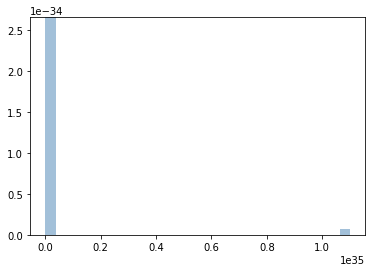

In [9]:
# Plotting a histogram to visualise the distribution of temperature values 
plt.hist(df['Avg_Temperature'], bins=30, normed=True, alpha=0.5,
histtype='stepfilled', color='steelblue');

- The outlier data values are distributed around the value 1.100000e+35 which is an abnormal data
- So we have to either drop these rows or replace these with some mean values.

In [10]:
#temperature values above 1000 is sure to be an outlier
df[df.Avg_Temperature>1000]

,City,Ward,Quarter,Avg_Temperature
25,Ahmedabad,23 THAKKARBAPANAGAR,2017_Qrt2,1.100000e+35
65,Ahmedabad,22 INDIA COLONY,2017_Qrt2,1.100000e+35
105,Ahmedabad,21 DARIYAPUR,2017_Qrt2,1.100000e+35
145,Ahmedabad,20 JODHPUR,2017_Qrt2,1.100000e+35
185,Ahmedabad,19 BODAKDEV,2017_Qrt2,1.100000e+35
...,...,...,...,...
53945,Pune,Ward 34,2017_Qrt2,1.100000e+35
53985,Pune,Ward 35,2017_Qrt2,1.100000e+35
54025,Pune,Ward 36,2017_Qrt2,1.100000e+35
54065,Pune,Ward 37,2017_Qrt2,1.100000e+35


In [11]:
#showing value counts of the outliers
df[df.Avg_Temperature>1000].Avg_Temperature.value_counts()

1.100000e+35    1353
Name: Avg_Temperature, dtype: int64

In [12]:
df[df.Avg_Temperature>1000].Quarter.value_counts()

2017_Qrt2    1353
Name: Quarter, dtype: int64

- The outliers are present in rows which have the Qurater value as 2017_Qrt2

In [13]:
#finding mean temp values for the quarter 2015_Qrt2 and 2016_Qrt2
temp1 = df[df.Quarter == '2015_Qrt2']['Avg_Temperature'].mean()
temp2 = df[df.Quarter == '2016_Qrt2']['Avg_Temperature'].mean()

In [14]:
# We can't drop the outliers for 2017_Qrt2 since it reduces the precision of our model
# but here we are replacing it with the mean value of that in 2015 and 2016
df.loc[df['Quarter'] == '2017_Qrt2', 'Avg_Temperature'] = (temp1+temp2)/2

In [15]:
df[df.Quarter == '2017_Qrt2']['Avg_Temperature']

25       304.274576
65       304.274576
105      304.274576
145      304.274576
185      304.274576
            ...    
53945    304.274576
53985    304.274576
54025    304.274576
54065    304.274576
54105    304.274576
Name: Avg_Temperature, Length: 1353, dtype: float64

In [16]:
# Adding new column for year
df['Year'] = df['Quarter'].str.split('_').str[0]

# Exploratory Data Analysis

## Univariate Analysis 

In [17]:
df.head()

,City,Ward,Quarter,Avg_Temperature,Year
0,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt1,295.678619,2011
1,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt2,306.939575,2011
2,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt3,301.500549,2011
3,Ahmedabad,23 THAKKARBAPANAGAR,2011_Qrt4,298.079620,2011
4,Ahmedabad,23 THAKKARBAPANAGAR,2012_Qrt1,294.388184,2012


- Categorical features present in dataset are City, Ward
- Ordinal variables are Quarter and Year
- Avg_Temperature feature is a continous variable

In [18]:
df.shape

(54120, 5)

- Total 54120 rows and 5 columns are present

In [19]:
# To show no.of rows for each city
df['City'].value_counts()

Delhi           11600
Chennai          8040
Bangalore        7920
Hyderabad        5800
Kolkata          5640
Bhopal           3440
Jaipur           3080
Pune             3040
Bhubhaneswar     2680
Ahmedabad        1920
Mumbai            960
Name: City, dtype: int64

- Delhi has more no.of data as the no.of wards is more in delhi than other cities

In [20]:
#Showing basic statistical data about Avg_Temperature after droping outliers
df.describe()

,Avg_Temperature
count,54120.000000
mean,299.721141
std,3.955309
min,290.436554
25%,296.776917
50%,299.021545
75%,303.460877
max,307.914551


- mean value of Avg_Temperature is 299.721141 K
- min value of Avg_Temperature is 290.436554 K
- standard deviation is 3.955309
- max value of Avg_Temperature is 307.914551 K
- The range of Avg_Temperature is 17.477997 K

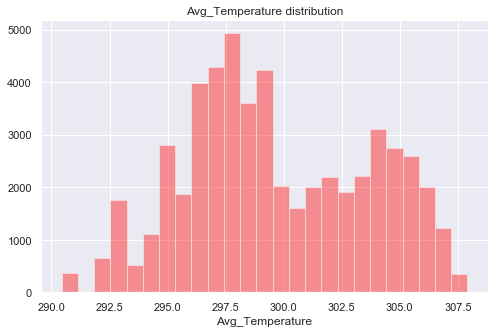

In [21]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df['Avg_Temperature'],bins=25,kde=False,color='red').set_title('Avg_Temperature distribution');

- The data is more distributed around 297.5 k

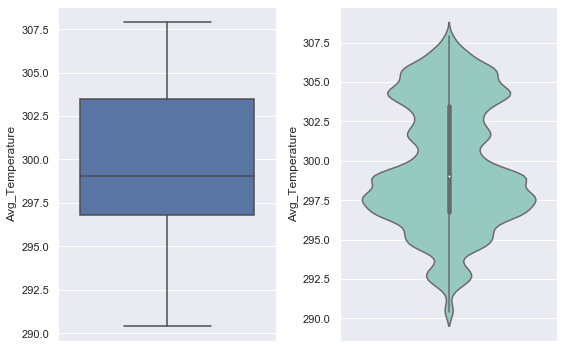

In [22]:
fig, axes = plt.subplots(1,2)
with sns.axes_style("dark"):
    sns.boxplot(ax = axes[0],data = df, y= 'Avg_Temperature',orient = 'v')
    sns.violinplot(ax = axes[1], data = df, y = 'Avg_Temperature',palette="Set3",orient='v')
fig.tight_layout()

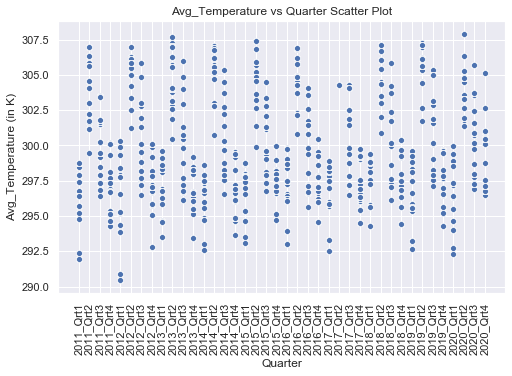

In [23]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=df,x='Quarter',y='Avg_Temperature')
plt.title('Avg_Temperature vs Quarter Scatter Plot')
plt.ylabel('Avg_Temperature (in K)')
plt.xticks(rotation = 90);

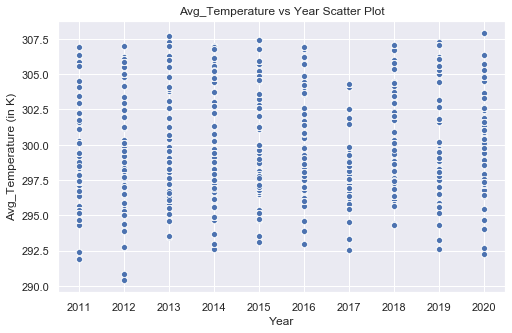

In [24]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=df,x='Year',y='Avg_Temperature')
plt.title('Avg_Temperature vs Year Scatter Plot')
plt.ylabel('Avg_Temperature (in K)');

In [25]:
#All the rows are grouped by city name and it's pandas groupby object
#is stored in the variable city_grp
city_grp = df.groupby(['City'])

### Time Series graph by taking average temperaure from all cities

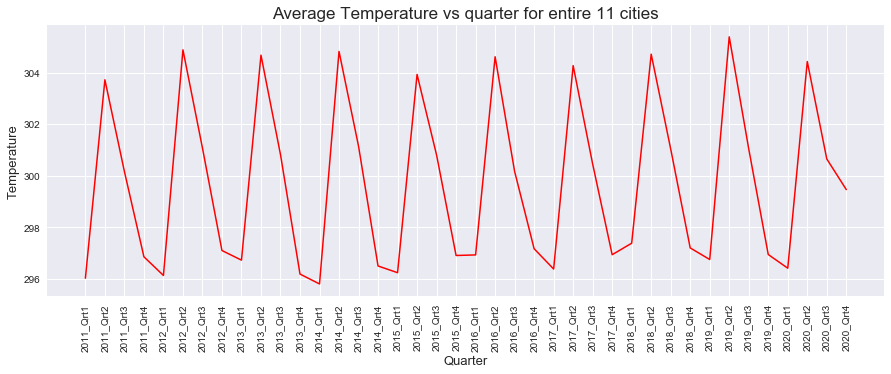

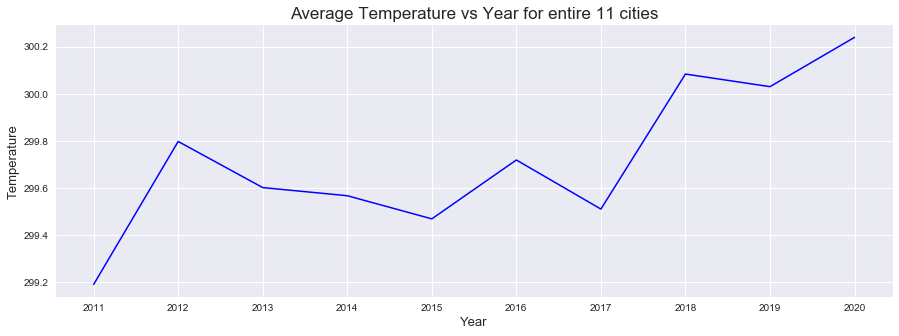

In [26]:
#grouping dataset based on Quarter and Year and taking the average of grouped data
temp_quarterly = df.groupby(['Quarter']).mean()
temp_yearly = df.groupby(['Year']).mean()

# Average Temperature vs Quarter graph based on 11 cities
plt.figure(figsize=(15,5)) #set figure size
plt.style.use('seaborn')
plt.plot(temp_quarterly.index,temp_quarterly['Avg_Temperature'],color='red',linestyle='solid',linewidth=1.5)
plt.title('Average Temperature vs quarter for entire 11 cities',fontsize=17)
plt.xlabel("Quarter",fontsize=13)
plt.ylabel("Temperature",fontsize=13)
plt.xticks(rotation = 90);

# Temperature vs year graph
plt.figure(figsize=(15,5)) #set figure size
plt.plot(temp_yearly.index,temp_yearly['Avg_Temperature'],color='blue',linestyle='solid',linewidth=1.5)
plt.title('Average Temperature vs Year for entire 11 cities',fontsize=17)
plt.xlabel("Year",fontsize=13)
plt.ylabel("Temperature",fontsize=13);

- When we look Quarter wise, the tempearature in each year first rises and then lowers to a min poin
- This pattern of temperature in quarter is repeating in all years
- The Temperature shows high values in the second quarter of each year
- Quarter wise graph depicts the seasonal behaviour of temperature, as the temperature are high in summer which lies in seond     quarter.
- Last Quarter of each year shows minimal values for temperature as it is winter season
- The Average Temperature vs year graph, shows that as the time goes the temperature is also increasing
- Also the temperature varying drastically,sometimes it may be lower than the value in the previous year,but on a long run it     is increasing

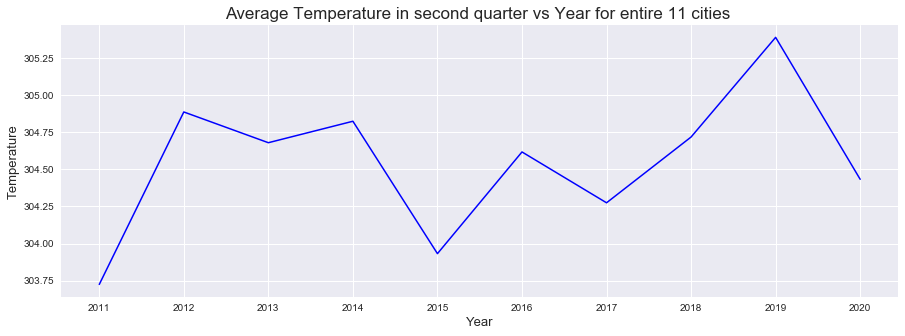

In [27]:
temp_yearly = df[df.Quarter.str.contains('_Qrt2')].groupby('Year').mean()

plt.figure(figsize=(15,5)) #set figure size
plt.plot(temp_yearly.index,temp_yearly['Avg_Temperature'],color='blue',linestyle='solid',linewidth=1.5)
plt.title('Average Temperature in second quarter vs Year for entire 11 cities ',fontsize=17)
plt.xlabel("Year",fontsize=13)
plt.ylabel("Temperature",fontsize=13);

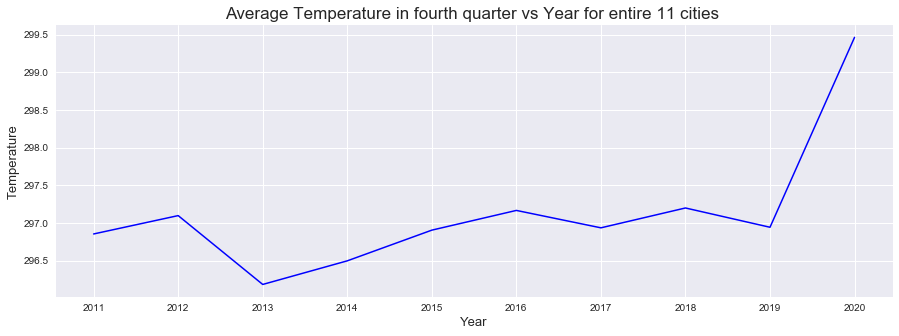

In [28]:
temp_yearly = df[df.Quarter.str.contains('_Qrt4')].groupby('Year').mean()

plt.figure(figsize=(15,5)) #set figure size
plt.plot(temp_yearly.index,temp_yearly['Avg_Temperature'],color='blue',linestyle='solid',linewidth=1.5)
plt.title('Average Temperature in fourth quarter vs Year for entire 11 cities ',fontsize=17)
plt.xlabel("Year",fontsize=13)
plt.ylabel("Temperature",fontsize=13);

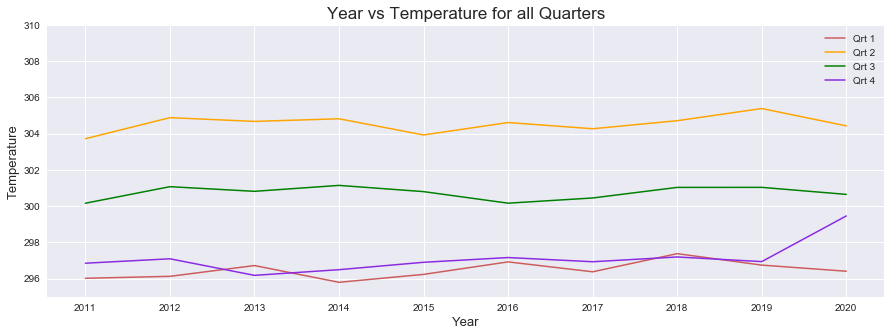

In [29]:
temp_yearly_1 = df[df.Quarter.str.contains('_Qrt1')].groupby('Year').mean()
temp_yearly_2 = df[df.Quarter.str.contains('_Qrt2')].groupby('Year').mean()
temp_yearly_3 = df[df.Quarter.str.contains('_Qrt3')].groupby('Year').mean()
temp_yearly_4 = df[df.Quarter.str.contains('_Qrt4')].groupby('Year').mean()

plt.figure(figsize=(15,5)) #set figure size
plt_1, = plt.plot(temp_yearly_1.index,temp_yearly_1['Avg_Temperature'],color='indianred',linestyle='solid',linewidth=1.5)
plt_2, = plt.plot(temp_yearly_2.index,temp_yearly_2['Avg_Temperature'],color='orange',linestyle='solid',linewidth=1.5)
plt_3, = plt.plot(temp_yearly_3.index,temp_yearly_3['Avg_Temperature'],color='green',linestyle='solid',linewidth=1.5)
plt_4, = plt.plot(temp_yearly_4.index,temp_yearly_4['Avg_Temperature'],color='blueviolet',linestyle='solid',linewidth=1.5)
plt.title('Year vs Temperature for all Quarters',fontsize=17)
plt.xlabel("Year",fontsize=13)
plt.ylim(295,310)
plt.ylabel("Temperature",fontsize=13)
plt.legend([plt_1,plt_2,plt_3,plt_4],['Qrt 1','Qrt 2','Qrt 3','Qrt 4']);

### Time Series graph of Temperature for each citiy

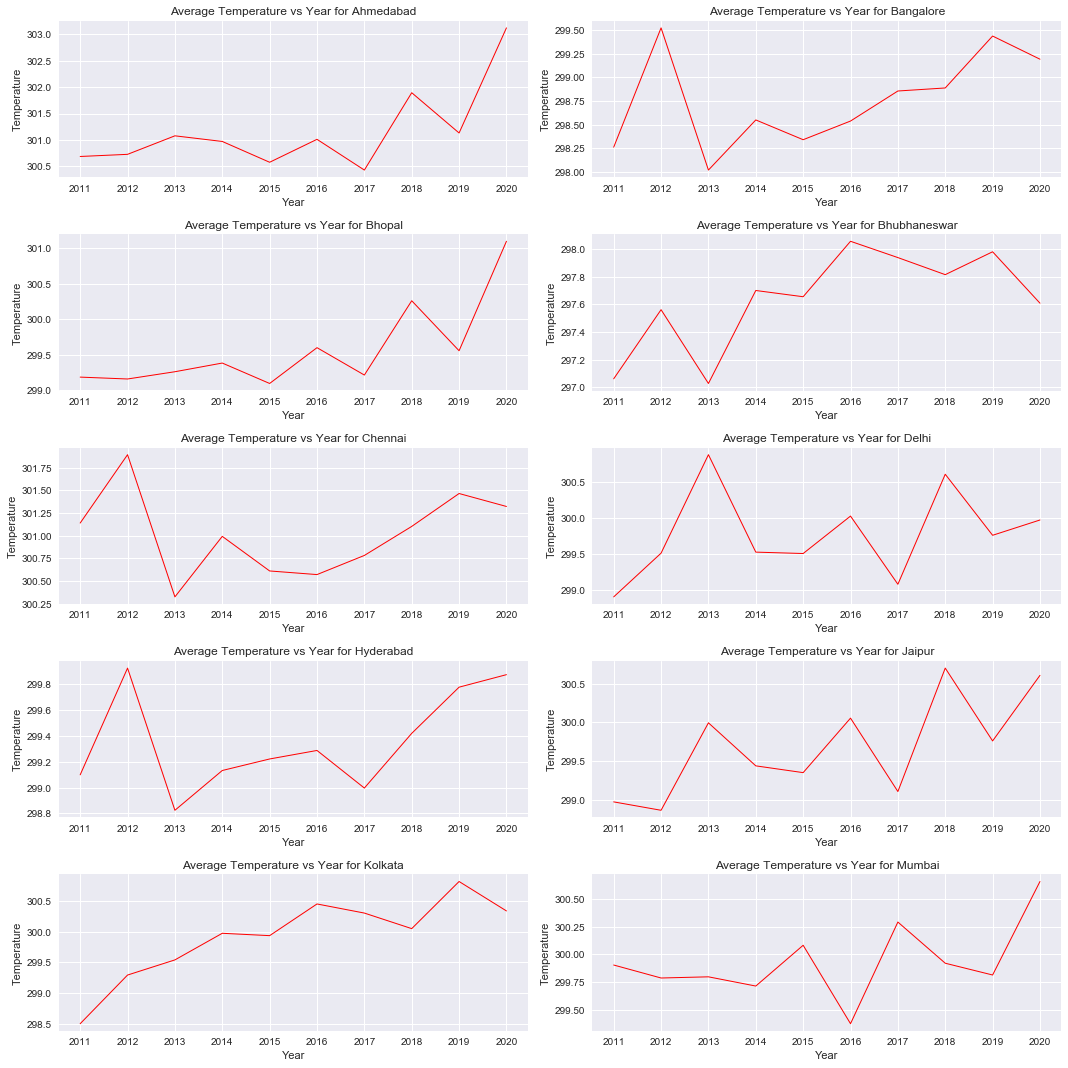

In [30]:
#creating a city column
city = list(df.City.unique())[:-1]
#plotting the graph of all cities by suplot looping
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range(2):
        temp_yearly = city_grp.get_group(city[i*2+j]).groupby(['Year']).mean()
        ax[i,j].plot(temp_yearly.index,temp_yearly['Avg_Temperature'],color='red',linestyle='solid',linewidth=1)
        ax[i,j].set(xlabel='Year', ylabel='Temperature')
        ax[i,j].set_title('Average Temperature vs Year for '+city[i*2+j],fontsize=12)
#         ax[i,j].grid(b=True, which='major', color='#666666', linestyle='-')
#         ax[i,j].minorticks_on()
#         ax[i,j].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
fig.tight_layout()

Text(0, 0.5, 'Temperature')

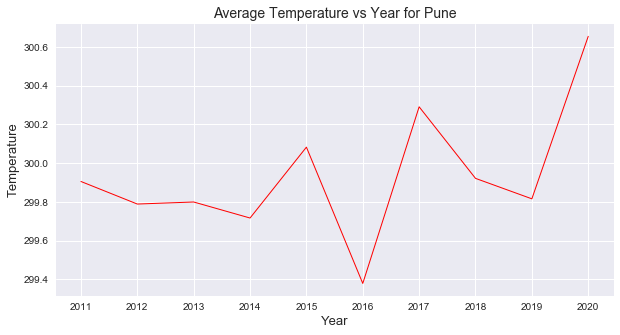

In [31]:
#plotting the remaining city Pune
Pune = city_grp.get_group('Pune').groupby(['Year']).mean()
plt.figure(figsize=(10,5)) #set figure size
plt.plot(Pune.index,Pune['Avg_Temperature'],color='red',linestyle='solid',linewidth=1)
plt.title('Average Temperature vs Year for Pune',fontsize=14)
plt.xlabel("Year",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

- Temperature shows some ups and downs over the year.
- But for most of the cities it is increasing.
- For other cities also, It will increase on long run since we are analysed the data with only 10 year span length.

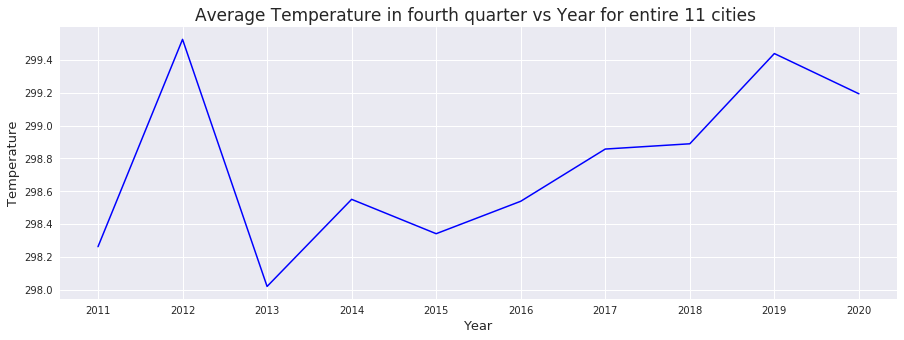

In [32]:
# temp_yearly = df[df.Quarter.str.contains('_Qrt4')]
temp_yearly = df[df.City == 'Bangalore'].groupby('Year').mean()
# Temperature vs year graph for Ahmedabad City
plt.figure(figsize=(15,5)) #set figure size
plt.plot(temp_yearly.index,temp_yearly['Avg_Temperature'],color='blue',linestyle='solid',linewidth=1.5)
plt.title('Average Temperature in fourth quarter vs Year for entire 11 cities ',fontsize=17)
plt.xlabel("Year",fontsize=13)
plt.rcdefaults()
plt.ylabel("Temperature",fontsize=13);

## Correlation 

### Correlation of Avg Temperature and SO2 emission

In [33]:
tmpb=df.copy()
tmpb.set_index("City",inplace=True)
tmpb=tmpb.loc["Bangalore"]
tmpb.head()

,Ward,Quarter,Avg_Temperature,Year
City,,,,
Bangalore,Chowdeswari Ward,2011_Qrt1,297.904449,2011
Bangalore,Chowdeswari Ward,2011_Qrt2,301.141754,2011
Bangalore,Chowdeswari Ward,2011_Qrt3,297.270111,2011
Bangalore,Chowdeswari Ward,2011_Qrt4,296.669830,2011
Bangalore,Chowdeswari Ward,2012_Qrt1,299.800842,2012


In [34]:
tempyr=tmpb[['Quarter','Ward','Avg_Temperature']].dropna()
cob=pd.read_csv('so2final.csv')
coyr=cob[['date','WARD_NAME','mean']].dropna()

In [35]:
t18_4=tempyr[(tempyr["Quarter"]=="2018_Qrt4")]
t19_1=tempyr[(tempyr["Quarter"]=="2019_Qrt1")]
t19_2=tempyr[(tempyr["Quarter"]=="2019_Qrt2")]
t19_3=tempyr[(tempyr["Quarter"]=="2019_Qrt3")]
t19_4=tempyr[(tempyr["Quarter"]=="2019_Qrt4")]
t20_1=tempyr[(tempyr["Quarter"]=="2020_Qrt1")]
t20_2=tempyr[(tempyr["Quarter"]=="2020_Qrt2")]
t20_3=tempyr[(tempyr["Quarter"]=="2020_Qrt3")]
ts=[t18_4,t19_1,t19_2,t19_3,t19_4,t20_1,t20_2,t20_3]
tmpyr=pd.concat(ts)
tmpyr.sort_values(["Ward"],axis=0,ascending=True,inplace=True)
tmpyr.sort_values(['Ward','Quarter'],ascending=[True,True],inplace=True)
coyr.sort_values(['WARD_NAME','date'],ascending=[True,True],inplace=True)
corr=tmpyr[['Quarter','Ward','Avg_Temperature']]
corr['SO2']=coyr['mean'].values
corr=corr.groupby('Quarter',as_index=False)['Quarter','Avg_Temperature','SO2'].mean()

In [36]:
corr.head(8)

,Quarter,Avg_Temperature,SO2
0,2018_Qrt4,296.714467,0.000072
1,2019_Qrt1,299.067578,0.000025
2,2019_Qrt2,304.396960,0.000016
3,2019_Qrt3,297.755757,0.000008
4,2019_Qrt4,296.529750,-0.000026
5,2020_Qrt1,299.193583,-0.000016
6,2020_Qrt2,303.546840,0.000100
7,2020_Qrt3,297.261841,0.000020


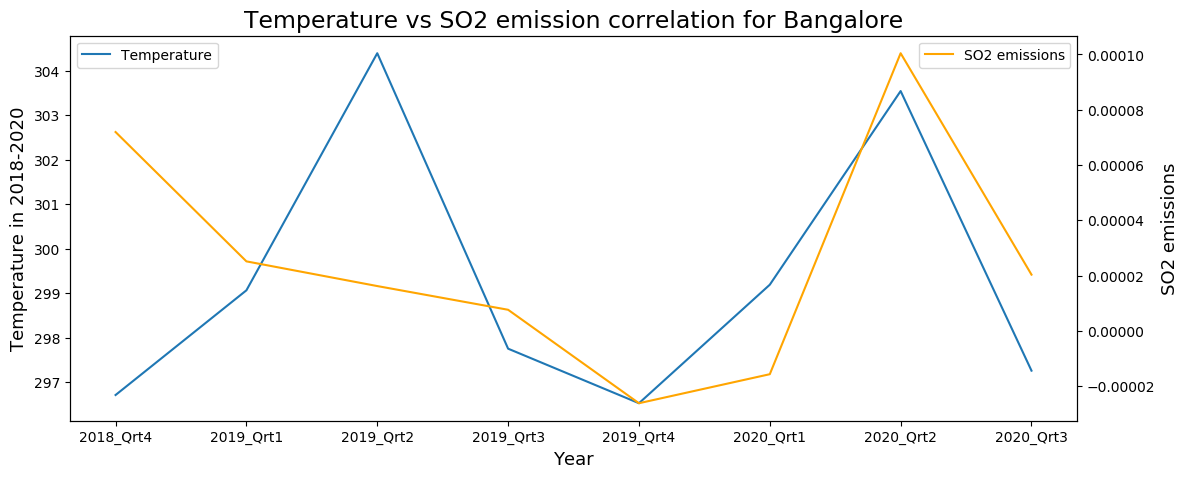

In [37]:
fig, ax1 = plt.subplots(figsize=(13,5))
plt.title('Temperature vs SO2 emission correlation for Bangalore',fontsize=17)

ax1.set_xlabel('Year',fontsize=13)
ax1.set_ylabel('Temperature in 2018-2020',fontsize=13)
ax1.plot(corr['Quarter'],corr['Avg_Temperature'], color='tab:Blue',label='Temperature',linewidth=1.5)
ax1.tick_params(axis='y')
plt.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('SO2 emissions',fontsize=13)  # we already handled the x-label with ax1
ax2.plot(corr['Quarter'],corr['SO2'], color='orange',label='SO2 emissions',linewidth=1.5)
ax2.tick_params(axis='y')
plt.legend(loc='upper right');

### Correlation of Avg Temperature and CO emission 

In [38]:
cob=pd.read_csv('BangloreCODensity.csv')

In [39]:
coyr=cob[['City','Date','Ward','CO_density']].dropna()

In [40]:
t19_1=tempyr[(tempyr["Quarter"]=="2019_Qrt1")]
t19_2=tempyr[(tempyr["Quarter"]=="2019_Qrt2")]
t19_3=tempyr[(tempyr["Quarter"]=="2019_Qrt3")]
t19_4=tempyr[(tempyr["Quarter"]=="2019_Qrt4")]
t20_1=tempyr[(tempyr["Quarter"]=="2020_Qrt1")]
t20_2=tempyr[(tempyr["Quarter"]=="2020_Qrt2")]
t20_3=tempyr[(tempyr["Quarter"]=="2020_Qrt3")]
t20_4=tempyr[(tempyr["Quarter"]=="2020_Qrt4")]
ts=[t19_1,t19_2,t19_3,t19_4,t20_1,t20_2,t20_3,t20_4]
tmpyr=pd.concat(ts)
tmpyr.sort_values(["Ward"],axis=0,ascending=True,inplace=True)
tmpyr.sort_values(['Ward','Quarter'],ascending=[True,True],inplace=True)

In [41]:
corr=tmpyr[['Quarter','Ward','Avg_Temperature']]
corr['CO_density']=coyr['CO_density'].values
corr.head()

,Quarter,Ward,Avg_Temperature,CO_density
City,,,,
Bangalore,2019_Qrt1,A Narayanapura,299.036652,0.035391
Bangalore,2019_Qrt2,A Narayanapura,304.424438,0.041864
Bangalore,2019_Qrt3,A Narayanapura,297.762207,0.023890
Bangalore,2019_Qrt4,A Narayanapura,296.461121,0.033235
Bangalore,2020_Qrt1,A Narayanapura,299.147522,0.035365


In [42]:
corr=corr.groupby('Quarter',as_index=False)['Quarter','Avg_Temperature','CO_density'].mean()

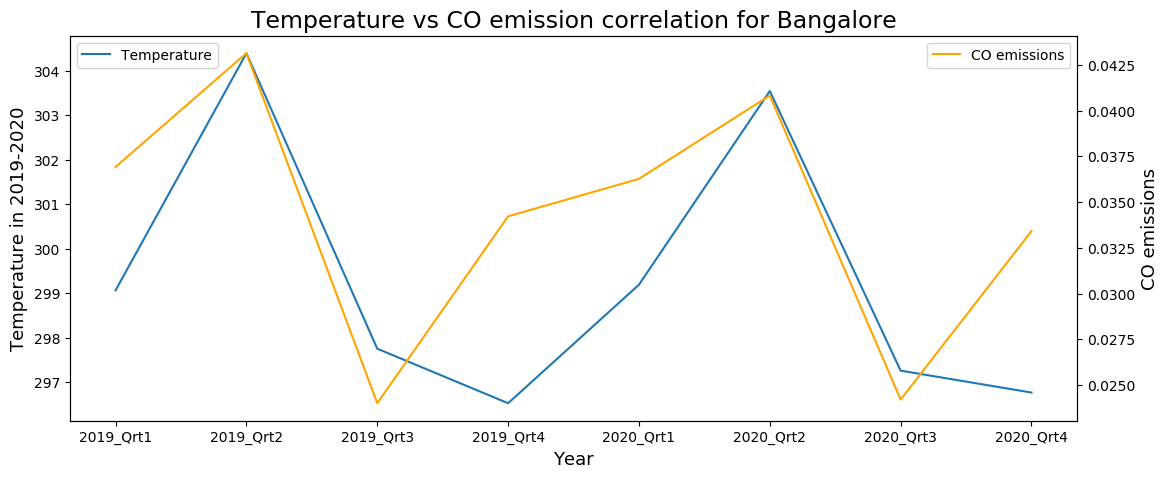

In [43]:
fig, ax1 = plt.subplots(figsize=(13,5))
plt.title('Temperature vs CO emission correlation for Bangalore',fontsize=17)

ax1.set_xlabel('Year',fontsize=13)
ax1.set_ylabel('Temperature in 2019-2020',fontsize=13)
ax1.plot(corr['Quarter'],corr['Avg_Temperature'], color='tab:Blue',label='Temperature',linewidth=1.5)
ax1.tick_params(axis='y')
plt.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('CO emissions',fontsize=13)  # we already handled the x-label with ax1
ax2.plot(corr['Quarter'],corr['CO_density'], color='orange',label='CO emissions',linewidth=1.5)
ax2.tick_params(axis='y')
plt.legend(loc='upper right');

In [44]:
corr.corr()

,Avg_Temperature,CO_density
Avg_Temperature,1.000000,0.747828
CO_density,0.747828,1.000000


# Regression 

In [45]:
#Taking yearly average data from df
temp_yearly = df.groupby(['Year']).mean()
temp_yearly['Year'] = temp_yearly.index.astype(int)

In [46]:
# Separating dependednt & Indepented Variables 
x = temp_yearly['Year'].values.reshape(-1,1)
y = temp_yearly['Avg_Temperature'].values.reshape(-1,1)

### Train test split 

In [47]:
#importing sklearn library methods for train test split and Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split the dataset into the training set and test set
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Model Training 

In [48]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)

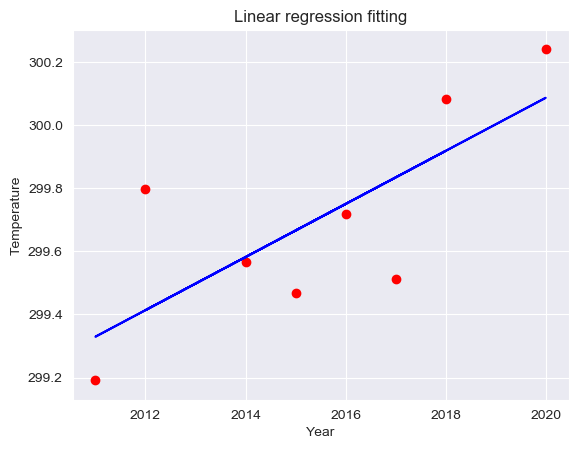

In [49]:
sns.set_style('darkgrid')
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plt.title('Linear regression fitting')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

### Model Evaluation 

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPrediction))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yPrediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPrediction)))

Mean Absolute Error: 0.0662660469616867
Mean Squared Error: 0.005849284773075856
Root Mean Squared Error: 0.07648061697630228


### Prediction for next 10 year

In [51]:
#test input values from 2021 to 2030
xTest = np.array([x for x in range(2021,2031)]).reshape(-1,1)

In [52]:
#Predicting future temperature using the model developed
yPrediction = linearRegressor.predict(xTest)

In [53]:
year = xTest.reshape(-1)
temp = yPrediction.reshape(-1)

In [54]:
fut_temp = pd.DataFrame({'year': year, 'Avg_Temperature': temp})
fut_temp

,year,Avg_Temperature
0,2021,300.170603
1,2022,300.254733
2,2023,300.338863
3,2024,300.422993
4,2025,300.507123
5,2026,300.591252
6,2027,300.675382
7,2028,300.759512
8,2029,300.843642
9,2030,300.927772


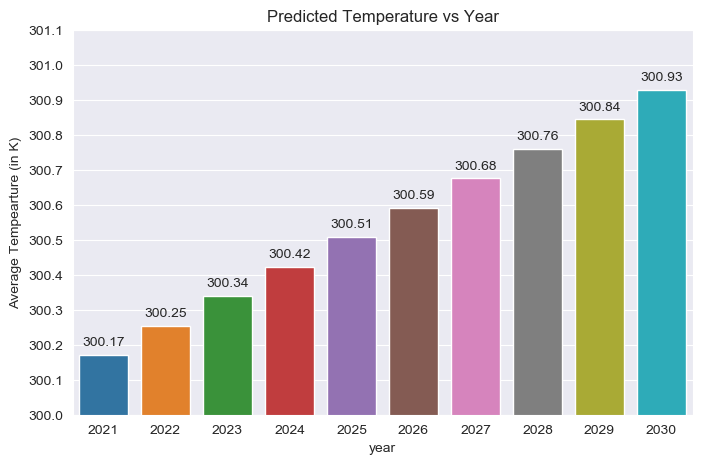

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5, forward=True)
splot = sns.barplot(x='year',y='Avg_Temperature',data=fut_temp,ax=ax)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
sns.set_style('darkgrid')
ax.set_title('Predicted Temperature vs Year')
ax.set_ylabel('Average Tempearture (in K)')
ax.set_ylim(300,301)
ax.set_yticks(np.arange(300,301.1,0.1))
plt.show()

# Conclusion

- From our analysis of last 10 year temperature data from NCEP NCAR surface temperature dataset,<br>
  we have understood that temperature changing is not a myth it's a reality.
- According to our prediction, The temperature is going to increase in the coming years
- In the next decade, The average temperature across indian cities will raise by 0.75 k